In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('navrood.csv')

In [5]:
df.head()

,Date,Qt-1,Pt,Qt
0,1994-09-24,2.17,0.0,2.17
1,1994-09-25,2.17,0.0,2.17
2,1994-09-26,2.17,0.0,2.17
3,1994-09-27,2.17,0.0,2.17
4,1994-09-28,2.17,0.0,2.10


In [6]:
len(df)

9495

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9495 entries, 0 to 9494
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9495 non-null   object 
 1   Qt-1    9495 non-null   float64
 2   Pt      9495 non-null   float64
 3   Qt      9495 non-null   float64
dtypes: float64(3), object(1)
memory usage: 296.8+ KB


In [13]:
df['Date'].isnull().sum()
df['Qt-1'].isnull().sum()
df['Pt'].isnull().sum()
df['Qt'].isnull().sum()

0
0
0


0

In [15]:
df['Date'].head()

0    1994-09-24
1    1994-09-25
2    1994-09-26
3    1994-09-27
4    1994-09-28
Name: Date, dtype: object

In [18]:
df['Date'] = pd.to_datetime(df['Date'])


In [22]:
df.head()

,Qt-1,Pt,Qt,Year,Month,Day
0,2.17,0.0,2.17,1994,9,24
1,2.17,0.0,2.17,1994,9,25
2,2.17,0.0,2.17,1994,9,26
3,2.17,0.0,2.17,1994,9,27
4,2.17,0.0,2.10,1994,9,28


In [20]:
df['Year'] = df['Date'].apply(lambda x: x.year)
df['Month'] = df['Date'].apply(lambda x: x.month)
df['Day'] = df['Date'].apply(lambda x: x.day)

In [21]:
df = df.drop('Date' , axis=1)

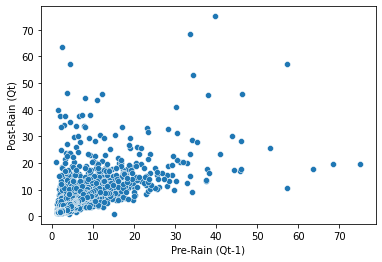

In [23]:
sns.scatterplot(x='Qt-1' , y='Qt' , data=df)
plt.xlabel('Pre-Rain (Qt-1)')
plt.ylabel('Post-Rain (Qt)')
plt.show()

In [25]:
df_org=df.copy()

In [34]:
def assign_season(month):
    if month in [12, 1, 2]:
        return '4'
    elif month in [3, 4, 5]:
        return '1'
    elif month in [6, 7, 8]:
        return '2'
    else:
        return '3'

In [35]:
df['Season'] = df['Month'].apply(assign_season)

In [29]:
df = df.drop(columns=['Day'])

In [36]:
df.head()

,Qt-1,Pt,Qt,Year,Month,Season
0,2.17,0.0,2.17,1994,9,3
1,2.17,0.0,2.17,1994,9,3
2,2.17,0.0,2.17,1994,9,3
3,2.17,0.0,2.17,1994,9,3
4,2.17,0.0,2.10,1994,9,3


In [42]:
df['Season']=df['Season'].astype(int)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9495 entries, 0 to 9494
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Qt-1    9495 non-null   float64
 1   Pt      9495 non-null   float64
 2   Qt      9495 non-null   float64
 3   Year    9495 non-null   int64  
 4   Month   9495 non-null   int64  
 5   Season  9495 non-null   int32  
dtypes: float64(3), int32(1), int64(2)
memory usage: 408.1 KB


In [44]:
seasonal_rainfall = df.groupby('Season')['Pt'].mean()
print("Average Rainfall by Season:")
print(seasonal_rainfall)

Average Rainfall by Season:
Season
1    2.262058
2    1.535610
3    3.621317
4    2.252412
Name: Pt, dtype: float64


In [45]:
df.head()

,Qt-1,Pt,Qt,Year,Month,Season
0,2.17,0.0,2.17,1994,9,3
1,2.17,0.0,2.17,1994,9,3
2,2.17,0.0,2.17,1994,9,3
3,2.17,0.0,2.17,1994,9,3
4,2.17,0.0,2.10,1994,9,3


In [49]:
df_encoded = pd.get_dummies(df, columns=['Season'], drop_first=False)

In [52]:
df_encoded

,Qt-1,Pt,Qt,Year,Month,Season_1,Season_2,Season_3,Season_4
0,2.170,0.000,2.170,1994,9,False,False,True,False
1,2.170,0.000,2.170,1994,9,False,False,True,False
2,2.170,0.000,2.170,1994,9,False,False,True,False
3,2.170,0.000,2.170,1994,9,False,False,True,False
4,2.170,0.000,2.100,1994,9,False,False,True,False
...,...,...,...,...,...,...,...,...,...
9490,2.421,5.935,1.970,2020,9,False,False,True,False
9491,1.970,0.164,1.850,2020,9,False,False,True,False
9492,1.850,0.000,1.740,2020,9,False,False,True,False
9493,1.740,68.355,15.000,2020,9,False,False,True,False


In [53]:
corr_matrix = df_encoded[['Qt', 'Qt-1', 'Pt','Season_1','Season_2','Season_3','Season_4']].corr()

In [55]:
print(corr_matrix)

                Qt      Qt-1        Pt  Season_1  Season_2  Season_3  Season_4
Qt        1.000000  0.713803  0.464273  0.235312 -0.237091  0.078043 -0.076441
Qt-1      0.713803  1.000000  0.114413  0.237382 -0.235391  0.075776 -0.077964
Pt        0.464273  0.114413  1.000000 -0.015144 -0.087038  0.118441 -0.015897
Season_1  0.235312  0.237382 -0.015144  1.000000 -0.336759 -0.334124 -0.332525
Season_2 -0.237091 -0.235391 -0.087038 -0.336759  1.000000 -0.334124 -0.332525
Season_3  0.078043  0.075776  0.118441 -0.334124 -0.334124  1.000000 -0.329923
Season_4 -0.076441 -0.077964 -0.015897 -0.332525 -0.332525 -0.329923  1.000000


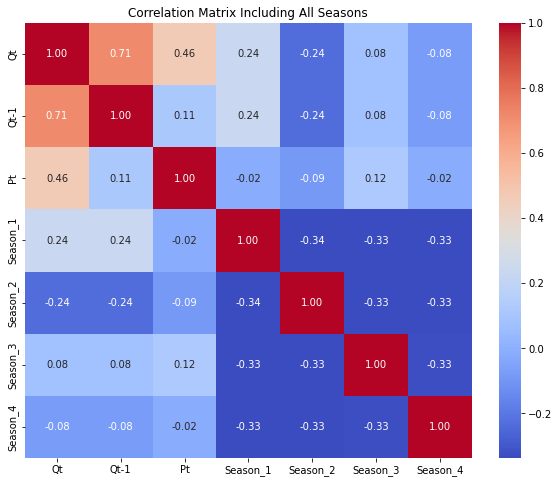

In [54]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Including All Seasons')
plt.show()

In [56]:
df.head()

,Qt-1,Pt,Qt,Year,Month,Season
0,2.17,0.0,2.17,1994,9,3
1,2.17,0.0,2.17,1994,9,3
2,2.17,0.0,2.17,1994,9,3
3,2.17,0.0,2.17,1994,9,3
4,2.17,0.0,2.10,1994,9,3


Linear Regression: As our baseline model.

In [58]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
X = df[['Qt-1', 'Pt', 'Year', 'Month']].values
y = df['Qt'].values

In [60]:
model = LinearRegression()

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
rmse_scores = []
r2_scores = []


In [ ]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    rmse_scores.append(rmse)
    r2_scores.append(r2)

In [78]:
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

In [79]:
print("Linear Regression with Original Features:")
print(f"Mean RMSE: {mean_rmse:.4f}")
print(f"Standard Deviation of RMSE: {std_rmse:.4f}")
print(f"Mean R² Score: {mean_r2:.4f}")
print(f"Standard Deviation of R² Score: {std_r2:.4f}")

Linear Regression with Original Features:
Mean RMSE: 2.2072
Standard Deviation of RMSE: 0.3480
Mean R² Score: 0.6498
Standard Deviation of R² Score: 0.0458


Including Season col too

In [81]:
X1 = df[['Qt-1', 'Pt', 'Season']].values
y = df['Qt'].values

In [82]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [83]:
rmse_scores_season = []
r2_scores_season = []

In [84]:
model = LinearRegression()

In [ ]:
for train_index, test_index in kf.split(X1):
    # Split data into train and test sets
    X_train, X_test = X1[train_index], X1[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # Append scores to lists
    rmse_scores_season.append(rmse)
    r2_scores_season.append(r2)

In [87]:
mean_rmse = np.mean(rmse_scores_season)
std_rmse = np.std(rmse_scores_season)
mean_r2 = np.mean(r2_scores_season)
std_r2 = np.std(r2_scores_season)

In [88]:
print(f"Linear Regression Results with K-Fold Cross-Validation on Option 2:")
print(f"Mean RMSE: {mean_rmse:.4f}, Standard Deviation of RMSE: {std_rmse:.4f}")
print(f"Mean R² Score: {mean_r2:.4f}, Standard Deviation of R² Score: {std_r2:.4f}")

Linear Regression Results with K-Fold Cross-Validation on Option 2:
Mean RMSE: 2.2367, Standard Deviation of RMSE: 0.3215
Mean R² Score: 0.6598, Standard Deviation of R² Score: 0.0171


better results in option2 now let's try it with Polynomial Features

In [90]:
from sklearn.preprocessing import PolynomialFeatures

In [91]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X1)

In [92]:
rmse_scores_poly = []
r2_scores_poly = []

In [ ]:
for train_index, test_index in kf.split(X_poly):
    # Split data into train and test sets
    X_train, X_test = X_poly[train_index], X_poly[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
   
    model.fit(X_train, y_train)
  
    y_pred = model.predict(X_test)
    
    rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_poly= r2_score(y_test, y_pred)
    
    # Append scores to lists
    rmse_scores_poly.append(rmse_poly)
    r2_scores_poly.append(r2_poly)

In [94]:
mean_rmse_poly = np.mean(rmse_scores_poly)
std_rmse_poly = np.std(rmse_scores_poly)
mean_r2_poly = np.mean(r2_scores_poly)
std_r2_poly = np.std(r2_scores_poly)

In [95]:
print(f"Linear Regression Results with K-Fold Cross-Validation using polynomial features on Option 2:")
print(f"Mean RMSE: {mean_rmse_poly:.4f}, Standard Deviation of RMSE: {std_rmse_poly:.4f}")
print(f"Mean R² Score: {mean_r2_poly:.4f}, Standard Deviation of R² Score: {std_r2_poly:.4f}")

Linear Regression Results with K-Fold Cross-Validation using polynomial features on Option 2:
Mean RMSE: 2.0316, Standard Deviation of RMSE: 0.3268
Mean R² Score: 0.7201, Standard Deviation of R² Score: 0.0204


Hybrid Approach (Qt-1, Pt, Month, Season)

In [100]:
X2 = df[['Qt-1', 'Pt','Month','Year','Season']].values
y = df['Qt'].values

In [101]:
rmse_scores_hybrid = []
r2_scores_hybrid = []


In [102]:
for train_index, test_index in kf.split(X2):
    X_train, X_test = X2[train_index], X2[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Evaluation
    rmse_hybrid = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_hybrid = r2_score(y_test, y_pred)
    
    rmse_scores_hybrid.append(rmse)
    r2_scores_hybrid.append(r2)

In [103]:
mean_rmse_hybrid = np.mean(rmse_scores_hybrid)
std_rmse_hybrid = np.std(rmse_scores_hybrid)
mean_r2_hybrid = np.mean(r2_scores_hybrid)
std_r2_hybrid = np.std(r2_scores_hybrid)

print("Linear Regression with hybrid Features:")
print(f"Mean RMSE: {mean_rmse_hybrid:.4f}")
print(f"Standard Deviation of RMSE: {std_rmse_hybrid:.4f}")
print(f"Mean R² Score: {mean_r2_hybrid:.4f}")
print(f"Standard Deviation of R² Score: {std_r2_hybrid:.4f}")

Linear Regression with hybrid Features:
Mean RMSE: 2.0077
Standard Deviation of RMSE: 0.0000
Mean R² Score: 0.6423
Standard Deviation of R² Score: 0.0000


###changing model yo SVR###

In [110]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [158]:
X = df[['Qt-1', 'Pt']].values
y = df['Qt'].values

Standardizing the features (important for SVR)

In [159]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)  


In [160]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

In [161]:
rmse_scores_svr = []
r2_scores_svr = []


In [153]:
model = SVR(kernel='rbf', C=100, epsilon=0.1)

In [162]:
for train_index, test_index in kf.split(X_poly):

    X_train, X_test = X_poly[train_index], X_poly[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model.fit(X_train, y_train)
   
    y_pred = model.predict(X_test)
    
    rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_svr = r2_score(y_test, y_pred)
    
    # Append scores to lists
    rmse_scores_svr.append(rmse_svr)
    r2_scores_svr.append(r2_svr)

In [164]:
mean_rmse_svr = np.mean(rmse_scores_svr)
std_rmse_svr = np.std(rmse_scores_svr)
mean_r2_svr = np.mean(r2_scores_svr)
std_r2_svr = np.std(r2_scores_svr)


In [165]:
print(f"SVR Results with K-Fold Cross-Validation:")
print(f"Mean RMSE: {mean_rmse_svr:.4f}, Standard Deviation of RMSE: {std_rmse_svr:.4f}")
print(f"Mean R² Score: {mean_r2_svr:.4f}, Standard Deviation of R² Score: {std_r2_svr:.4f}")

SVR Results with K-Fold Cross-Validation:
Mean RMSE: 2.4315, Standard Deviation of RMSE: 0.4265
Mean R² Score: 0.5997, Standard Deviation of R² Score: 0.0471


In [166]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)